In [9]:
import pandas as pd
import numpy as np
import json
import os
import pathlib
import warnings

from mplsoccer import Pitch
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

# Get data

In [2]:
data = pd.read_csv("summary.csv")
data.head()

,shortName,role,xD_per_90,danger_passes_per_90
0,K. De Bruyne,Midfielder,0.614987,5.043783
1,J. Grealish,Forward,0.477864,5.633588
2,M. Kovačić,Midfielder,0.474472,3.848858
3,M. Ødegaard,Midfielder,0.473998,4.090909
4,T. Alexander-Arnold,Defender,0.463308,4.653740


In [7]:
data.role.value_counts()

role
Defender      132
Midfielder    121
Forward        95
Goalkeeper     32
Name: count, dtype: int64

In [13]:
# Colors
background_color = "#f2f4ee"
dark_color = "#053225"
keeper_color = "#632A50"
defender_color = "#E57A44"
midfielder_color = "#388697"
forward_color = "#B91372"

# Density plots per role

<Axes: xlabel='xD_per_90', ylabel='Density'>

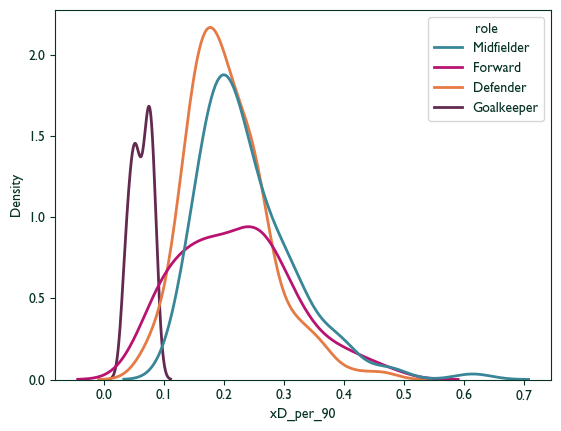

In [21]:
role_colors = {
    'Goalkeeper': keeper_color,
    'Defender': defender_color,
    'Midfielder': midfielder_color,
    'Forward': forward_color
}
sns.kdeplot(data=data, x='xD_per_90', hue='role', palette=role_colors, linewidth=2)

<Axes: xlabel='danger_passes_per_90', ylabel='Density'>

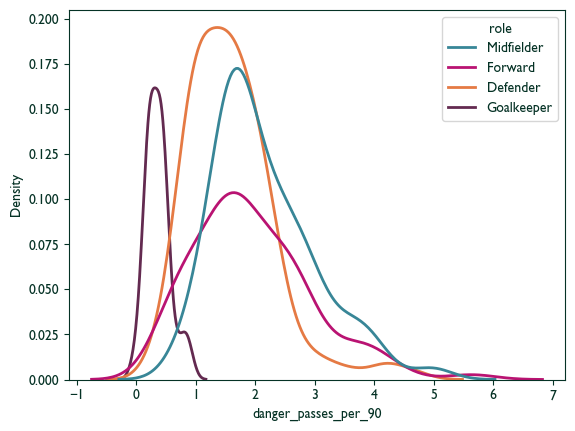

In [20]:
sns.kdeplot(data=data, x='danger_passes_per_90', hue='role', palette=role_colors, linewidth=2)

# xD per 90 v Danger passes per 90

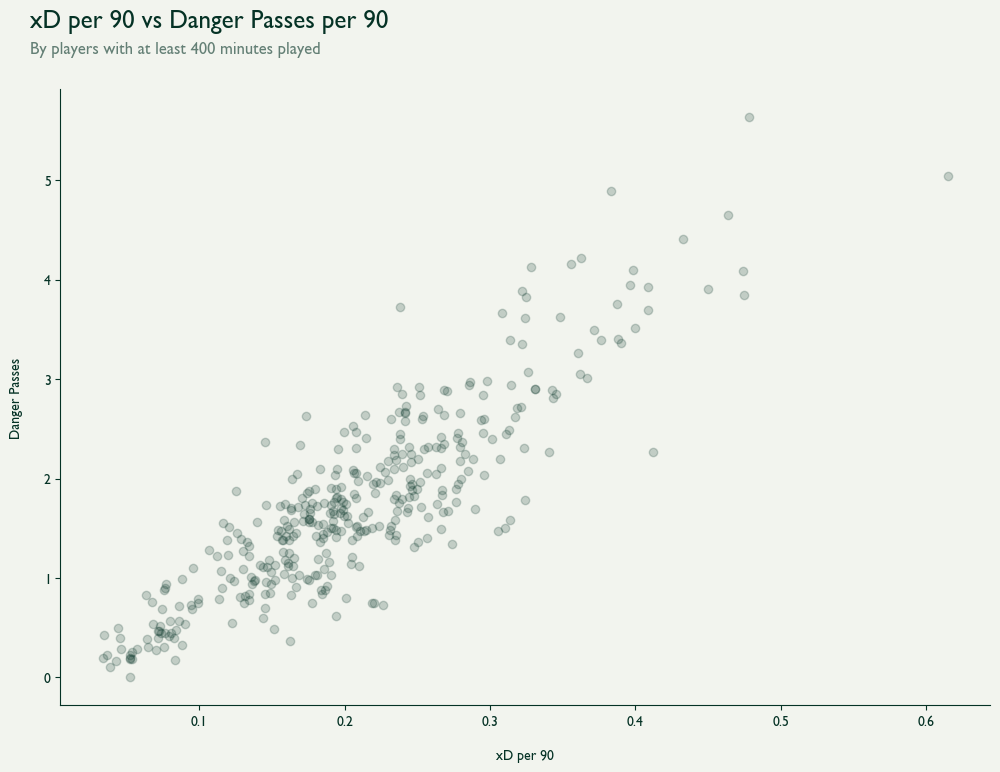

In [5]:
# Init plot
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
plt.rcParams['font.family'] = 'Gill Sans'
plt.rcParams.update({
    'text.color': dark_color,
    'axes.labelcolor': dark_color,
    'axes.edgecolor': dark_color,
    'xtick.color': dark_color,
    'ytick.color': dark_color,
    'grid.color': dark_color,
})

# Set titles and labels
plt.suptitle('xD per 90 vs Danger Passes per 90', fontweight='bold', fontsize=18, ha='left', x=0.1, y=0.98)
plt.text(0.1, 0.92, 'By players with at least 400 minutes played', ha='left', va='bottom', transform=plt.gcf().transFigure, fontsize=12, color=dark_color, alpha=0.6)
plt.xlabel('xD per 90', labelpad=15)
plt.ylabel('Danger Passes', labelpad=15)

# Scatter plot of dribbles per 90 and dribble success rate
for i, row in data.iterrows():
    plt.scatter(row['xD_per_90'], row['danger_passes_per_90'], color=dark_color, alpha=.2)

# Get important players: top 3 per 90 and top 3 per success rate
# df_top_per_90 = df_filtered.sort_values('dribbles_per_90', ascending=False).head(3)
# df_top_success_rate = df_filtered.sort_values('dribble_success_rate', ascending=False).head(3)

# Plot important player names
# for i, row in df_top_per_90.iterrows():
#     alpha = 1.0 if row['player_name'] == 'Jeremy Doku' else 0.4
#     plt.text(x = row['dribbles_per_90'] + 0.08, y = row['dribble_success_rate'] + 0.3, s=row['player_name'], fontsize=10, alpha=alpha)

# for i, row in df_top_success_rate.iterrows():
#     alpha = 1.0 if row['player_name'] == 'Jeremy Doku' else 0.4
#     plt.text(x = row['dribbles_per_90'] + 0.08, y = row['dribble_success_rate'] + 0.3, s=row['player_name'], fontsize=10, alpha=alpha)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()